# Breast Cancer Dataset

Breast cancer is the most common type of cancer worldwide.

Data was obtained from the 'Breast Cancer Wisconsin (Diagnostic) Data Set, from Kaggle.

This is a personal mini-project where I will aim to improve my Python and machine learning skills.

To run the notebook, please make sure the .csv is called "breast_cancer_data" and in a folder called "cancer_data".

# Importing Libraries

In [196]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

print("Packages loaded successfully")

Packages loaded successfully


# Reading in the Dataset

In [197]:
cancer_data_filepath = Path("cancer_data") / "breast_cancer_data.csv"
cancer_data = pd.read_csv(cancer_data_filepath)

In [198]:
# Checking shape of the dataset
cancer_data.shape

(569, 33)

In [199]:
# Displaying the first few rows of the dataset
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [200]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [201]:
# The 'id' and 'Untitled: 32' columns are not needed for analysis and may cause issues when trying to train a model
cancer_data = cancer_data.drop(columns=['id', 'Unnamed: 32'])
# Now there should be no null values in the dataset
cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [202]:
# Checking the first few rows again
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Dataset Summary

In [203]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Visualization

C:\Users\willp\AppData\Local\Temp\ipykernel_11296\1311588488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cancer_data, x='diagnosis', palette=custom_palette)


Text(0, 0.5, 'Count')

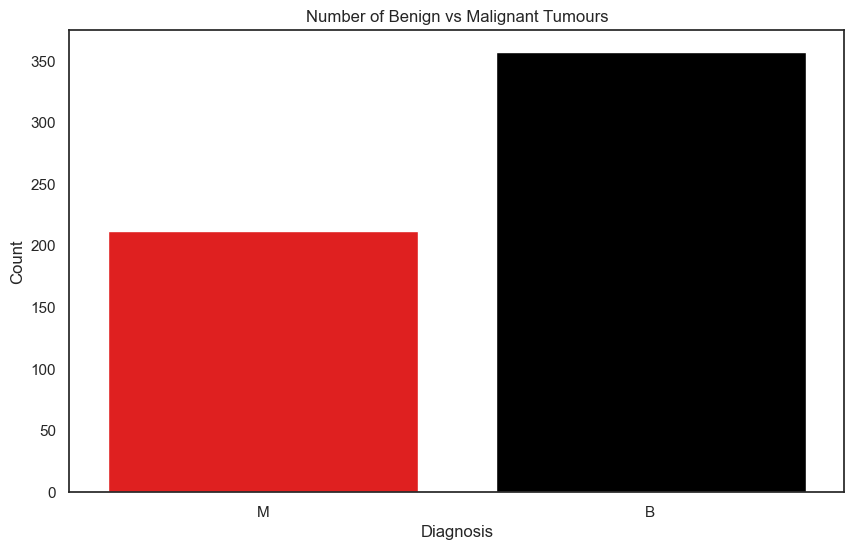

In [209]:
# Barchart of number of benign vs malignant tumours
custom_palette = {"M": "red", "B": "black"}
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.countplot(data=cancer_data, x='diagnosis', palette=custom_palette)
plt.title('Number of Benign vs Malignant Tumours')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

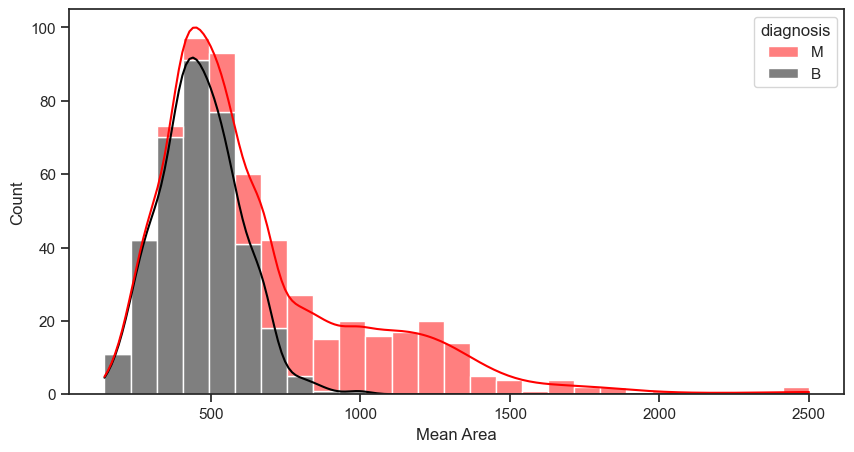

In [210]:
# Histogram of the mean areas in benign and malignant tumors
# Area is an arbitrary measure of the size of the tumour using pixel counts, so has no real-world units
plt.figure(figsize=(10, 5))
custom_palette = {"M": "red", "B": "black"}
sns.set_style("ticks")
sns.histplot(data=cancer_data, x='area_mean', hue='diagnosis', multiple='stack', kde=True, 
             palette=custom_palette)
plt.xlabel("Mean Area")
plt.ylabel("Count")

<Axes: >

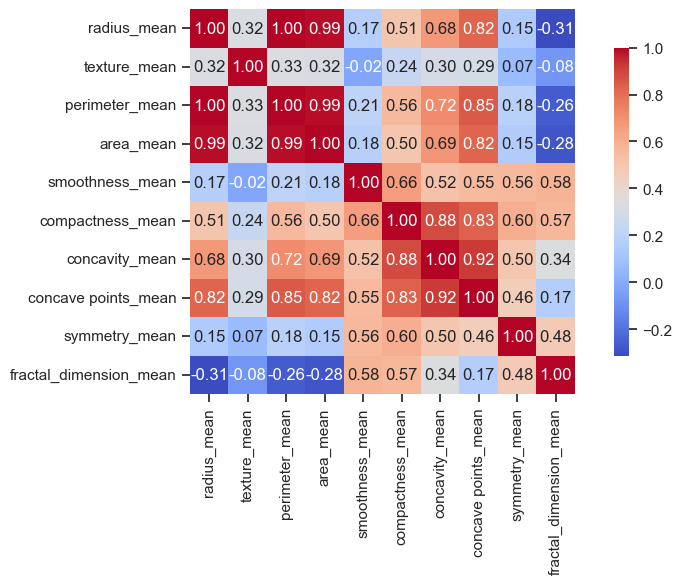

In [211]:
# Correlation heatmap of features
# Only using the means of the features for simplicity
cancer_means = cancer_data.filter(regex='_mean$')
plt.figure(figsize=(10, 5))
numeric_data = cancer_means.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})



<Axes: >

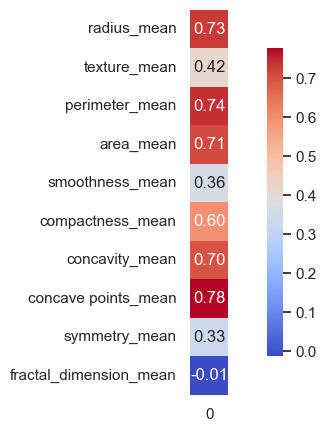

In [212]:
# Correlation heatmap looking at which features are most correlated with the diagnosis
# Only using mean values again 
sns.set_style("white")
cancer_means_2 = cancer_data.filter(regex='_mean$')
plt.figure(figsize=(10, 5))
numeric_data_2 = cancer_means_2.select_dtypes(include=[np.number])
sns.heatmap(numeric_data_2.corrwith(cancer_data['diagnosis'].map({'M': 1, 'B': 0})).to_frame(), 
            annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Malignant tumours are closer to 1 (red) and benign tumours are closer to 0 (blue)
# Radius, perimeter, area, and concave points seem to predicts malignancy the best

# Preprocessing Data

In [213]:
# Converting the diagnosis column to a numerical format
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

In [214]:
# Splitting the data into features and target variable
X = cancer_data.drop(columns=['diagnosis'])
y = cancer_data['diagnosis']

In [215]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest Classifier Model

In [216]:
# Defining a pipeline for the Random Forest Classifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [217]:
# Cross-validation to evaluate the model, using 5 folds
cv_rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(cv_rf_scores.mean())

0.9626373626373628


Random Forest model gives 96.2% accurate prediction of benign or malignant using cross validated training data

# XGBoost Classifier Model

In [218]:
# Defining a pipeline for XGBoost Classifier
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))])

In [219]:
# Cross-validation to evaluate the XGBoost model, using 5 folds
cv_xgb_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(cv_xgb_scores.mean())

0.9670329670329672


XGBoost model gives 96.7% accurate prediction of benign or malignant using cross validated training data

# Comparing RF and XGB models on test data

In [ ]:
# Fitting Random Forest pipeline on full training data 
# and predicting with test data
rf_pipeline.fit(X_train, y_train)
rf_test_pred = rf_pipeline.predict(X_test)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
print(f"Random Forest Test Accuracy: {rf_test_acc * 100:.5f}%")

# Fitting XGBoost pipeline on full training data 
# and predicting with test data
xgb_pipeline.fit(X_train, y_train)
xgb_test_pred = xgb_pipeline.predict(X_test)
xgb_test_acc = accuracy_score(y_test, xgb_test_pred)
print(f"XGBoost Test Accuracy: {xgb_test_acc * 100:.5f}%")

Random Forest Test Accuracy: 97.36842%
XGBoost Test Accuracy: 97.36842%
